In [1]:
#Loading all the necessary libraries



import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset

dataframe = pd.read_csv('Fruits_Dataset.csv')

In [3]:
#First five rows of the dataset

dataframe.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79


In [4]:
#shape of the data

dataframe.shape

(60, 7)

In [5]:
#To insert the mean value of each column into its missing rows

dataframe.fillna(dataframe.mean(numeric_only=True).round(1), inplace=True)
dataframe

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,86.0,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79
5,2,mandarin,mandarin,80.0,5.8,4.3,0.77
6,2,mandarin,mandarin,80.0,5.9,4.3,0.81
7,2,mandarin,mandarin,76.0,5.8,4.0,0.81
8,1,apple,braeburn,178.0,7.1,7.8,0.92
9,1,apple,braeburn,172.0,7.4,7.0,0.89


In [6]:
#Splitting the dataset into training and testing sets


X = dataframe[['fruit_label', 'mass', 'width', 'height', 'color_score']]
y = dataframe['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# try K=1 through K=10 and record testing accuracy
k_range = range(1, 11)

# Running KNN for various values of n_neighbors and storing results
knn_r_acc = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_score = knn.score(X_test,y_test)
    train_score = knn.score(X_train, y_train)
    knn_r_acc.append((i, test_score ,train_score))
dataframe = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(dataframe)

    K  Test Score  Train Score
0   1    0.750000     1.000000
1   2    0.833333     0.854167
2   3    0.750000     0.812500
3   4    0.666667     0.770833
4   5    0.500000     0.708333
5   6    0.500000     0.708333
6   7    0.583333     0.729167
7   8    0.583333     0.750000
8   9    0.500000     0.666667
9  10    0.416667     0.645833


Text(0, 0.5, 'Testing Accuracy')

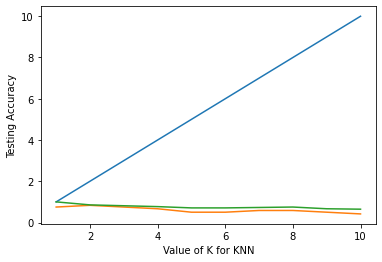

In [8]:
# Visualization of k values vs accuracy

plt.plot(k_range, knn_r_acc)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [9]:
y_pred= knn.predict(X_test)
y_pred

array([4, 3, 4, 4, 3, 1, 4, 3, 3, 4, 4, 3], dtype=int64)